<a href="https://colab.research.google.com/github/Jayaramgokul/NLP-Projects/blob/main/Copy_of_CS4740_FA21_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Language Modeling and Fake Review Classification

Names:

Netids:


**After you make your own copy, please rename this notebook by clicking on it's name in the upper left corner.** It should be named: CS4740_FA21_p1_netid1_netid2

Don't forget to share your newly copied notebook with your partner!

**Reminder: both of you can't work in this notebook at the same time from different computers/browser windows because of sync issues. We even suggest to close the tab with this notebook when you are not working on it so your partner doesn't get sync issues.**

---



## Introduction
In this project we will build an **n-gram-based language model** for deceptive review classification. We will also investigate a feature-based **Naive Bayes model**. The task we are faced with is to **decide whether a hotel review is deceptive or truthful**. This is a relavent problem as websites that contain consumer reviews are a target of opinion spam. Typically, these deceptive opinions are neither easily ignored nor even identifiable by a human reader so we'd like to assist in flagging reviews. The dataset we are investigating looks at *deceptive opinion spam*, that is decetive opinions that have been purposely written to sound genuine ([Ott et al](https://arxiv.org/pdf/1107.4557.pdf)).

To help us approach this problem, we will use NLP techniques covered thus far to frame this as a (supervised) binary classification task, where each opinion will have a label $y \in \{0,1\}$, where *0 indicates a truthful review* and *1 indicates a deceptive one*. You will train and validate your two different models and then run them on a test data set with hidden $y$ labels. You will then submit the results on the test data set to Kaggle to participate in our class-wide competition!

The project is divided into six parts:
1. Dataset loading and preprocessing
2. Unsmoothed n-gram language model (LM): build the unsmoothed n-gram language model using our Fake Review corpus. 
3. Smoothed n-gram language model: build a smoothed version of the model from part 2.
4. Perplexity: compute perplexity for both the unsmoothed and smoothed model
5. Putting everything together and submitting the first model to Kaggle
6. Naive Bayes: build a feature-based Naive Bayes model to perform the same classification task. Compare the LM with Naive Bayes and identify the pros and cons of each.

## Logistics (IMPORTANT!)
- You should work in **groups of 2 students**. Students in the same group will get the same grade. Thus, you should make sure that everyone in your group contributes to the project. 
- **Remember to form groups on BOTH CMS and Gradescope** or not all group members will receive grades. You can use make a post on EdStem to find a partner for this project.
- Please complete the written questions of this notebook in a clear and informative way. We have created a template document for you to answer the written questions. This document can be found [here](https://docs.google.com/document/d/11GX5vG8TeHk1F2eakOgbTFaqYl3lfvZf9fYoMUTVGMs/edit?usp=sharing). Please make a copy of this document for yourself and add your names and netids in the header and answer the written questions on it. You will need to submit this document to gradescope as well (do not forget to do this please!).
- At the end: please make sure to submit the following 3 items:
  1. PDF version of Colab notebook on Gradescope (instructions for converting to PDF are at the end).
  2. PDF version of Google Doc with written answers on Gradescope.
  3. .ipynb version of your colab notebook on CMS.

**Advice:** The written questions is where you get to show us that you understand not only what you are doing but also why and how you are doing it. So be clear, organized and concise; avoid vagueness and excess verbiage. Spend time doing error analysis for the models. This is how you understand the advantages and drawbacks of the systems you build. It's also useful to think about how the theory of n-grams/Naive Bayes bridges with the real world application we are building. Think about what you expect from these models based on your current understanding, and then see if your expectation aligns with empirical results that you'll get. 

## General Guidelines
In this project, we provide a few code snippets or starter points in case you need them. You DO NOT need to follow the structure. 

If you think you have a better idea, go for it. You can ADD, MODIFY, or DELETE any code snippets given to you.

You are expected to use functions or classes to organize your code. A portion of the grade is regarding code cleanliness / readability and applying these models in the real world means we need to collaborate with others (ie. other people should be able to read your code and run it)!

To help with debugging and testing, you should use this example from class [09-02 Thurs - lec3: N-gram models](https://edstem.org/us/courses/12801/resources) as your training corpus:

```
<s> I see what I eat and I eat what I see.
```

The test sentence you can use also comes from class:
```
I see what
```

**Let's do this** 🚀

### Dataset

You are given a **Review Corpus** on CMS, which consists of roughly the same amount of real and fake reviews.

Real review example:
```
Stayed with a group for a bachelorette party, and was disappointed. The hotel is beautiful, the staff was all rather friendly. The main problem was the room/sleeping situation. We had booked rooms with 2 queen beds several weeks before, but received an email a few days before our visit stating they were sold out (how that happens I don't know!!) so they "upgraded" us to two "suites" with a king and a pull out. First, this meant our party was split up and on different floors. Second, that meant two of us were stuck on a pull out couch. :( I'm not a picky, unreasonable person, but that was the WORST "bed" I've ever slept on! It was sunken in the middle so we literally rolled into each other unless we balanced ourselves on the very edge of the bed. Then there were the springs poking into our backs ALL night! Just awful! For the amount of money we spent I expected to be comfortable! I would not stay here again after this experience.
```

Fake review example:
```
I truly enjoyed my stay at the Omni Chicago Hotel. We stayed in a suite, which was clean and extremely nice, at a very reasonable rate. My husband and I spent quite a bit of time in the indoor pool, but personally I preferred laying out on the sundeck. Service was excellent; they were friendly and all of our needs were met promptly. I would definitely recommend this hotel to anyone looking to have a great experience in the downtown Chicago area.
```

In the dataset folder you should find 2 files, training and validation splits for both real and fake reviews.

The project will proceed generally as follows in terms of code development:
1. Write code to train unsmoothed unigram and bigram language models for an arbitrary corpus
2. Implement smoothing and unknown word handling. 
3. Implement the Perplexity calculation. 
4. Using 1, 2 and 3, together with the provided training and validation sets, develop a language-model-based approach for Fake Review Classification.
5. Apply your best language-model-based review classifier (from 4) to the
provided test set. Submit the results to the online Kaggle competition. 
6. Use any existing implementation of Naive Bayes (and the provided training and validation sets) to create an additional Naive Bayes fake review classifier. Apply your best NB classifier to the provided test set. Submit the results to the separate Kaggle competition (for NB classifiers). 

We will progress towards these tasks throughout this notebook.

# Part 1: Preprocessing the Dataset
In this part, you are going to do a few things:
* Connect to the google drive where the data set is stored
* Load and read files
* Preprocess the text

------
**Please upload the dataset to each partner's individual Google Drive now.** We suggest using the same folder structure within Google Drive because the notebook is shared among you, so the code to load the data would have to be changed every time if folder structures are different. One folder structure might be: Google Drive/CS 4740/Project 1/Dataset/ or whatever works for you. See our code below for an example of how we load the data from Google Drive.

## 1.1 Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.2 Load and read files
First, let's install [NLTK](https://www.nltk.org/), a very widely package for NLP preprocessing (and other tasks) for Python.

In [ ]:
!pip install -U nltk tqdm

     |████████████████████████████████| 1.5 MB 2.7 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.2
    Uninstalling tqdm-4.62.2:
      Successfully uninstalled tqdm-4.62.2
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


Then we read and load data.

In [ ]:
import os
import csv
import io
from nltk import word_tokenize, sent_tokenize
import nltk
from tqdm.notebook import tqdm
nltk.download('punkt')

root_path = os.path.join(os.getcwd(), "drive", "My Drive/NLP Project") 
dataset_path = os.path.join(root_path) # same here

real_review_train = []
real_review_validation = []
fake_review_train = []
fake_review_validation = []

def load_real_fake_dataset(dataset_path, filename):
    real = []
    fake = []
    with open(os.path.join(dataset_path, filename)) as fp:
        csvreader = csv.reader(fp, delimiter="|")
        for txt, label in csvreader:
            label = int(label)
            if label:
                fake.append(txt)
            else:
                real.append(txt)
    
    return real, fake

real_review_train, fake_review_train = load_real_fake_dataset(dataset_path, "P1_real_fake_review_train.txt")

real_review_validation, fake_review_validation = load_real_fake_dataset(dataset_path, "P1_real_fake_review_val.txt")

def load_test_dataset(dataset_path, filename):
    output = []
    with open(os.path.join(dataset_path, filename)) as fp:
        csvreader = csv.reader(fp, delimiter=" ")
        for id, text in csvreader:
          output.append(text)
    output.pop(0)
    return output
f_test = load_test_dataset(dataset_path,"P1_real_fake_review_test.txt" )

def tokenize_reviews(reviews):
    return [
        [
            word.lower() for sent in sent_tokenize(review)
            for word in word_tokenize(sent)
        ]
        for review in tqdm(reviews, leave=False)
    ]


tokenized_real_review_training = tokenize_reviews(real_review_train)                              # Tokenizing our real review training data
tokenized_fake_review_training = tokenize_reviews(fake_review_train)                              # Tokenizing our fake review training data
tokenized_review_training = tokenized_real_review_training + tokenized_fake_review_training       # Combining our tokenized real and fake review training data
tokenized_real_review_validation = tokenize_reviews(real_review_validation)                       # Tokenizing our real review validation data
tokenized_fake_review_validation = tokenize_reviews(fake_review_validation)                       # Tokenizing our fake review validation data
tokenized_review_validation = tokenized_real_review_validation + tokenized_fake_review_validation # Combining our tokenized real and fake review validation data
tokenized_review_test = tokenize_reviews(f_test)                                                  # Tokenizing our fake review training data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/642 [00:00<?, ?it/s]

  0%|          | 0/638 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

Sanity checks for our real and fake training sets

In [ ]:
tokenized_real_review_training[0]

In [ ]:
tokenized_fake_review_training[0]

In [ ]:
tokenized_review_training[0]

## 1.2.5 Creating a labelled table

In [ ]:
# ****  FUNCTION - lbltble(rvw,label=0) *******
'''
Purpose:
To create a table with reviews column and indicator column for "real or "fake" reviews  

Arguments:
rvw: list of reviews
label: indicator value we wish to assign to a column  of the table

Returns:
A final table with review and indicator column differentiating the "real " and "fake" reviews

'''

def lbltble(rvw,label=0): 
  import pandas as pd
  df_review = pd.DataFrame(rvw, columns = ["Review"])                           # Creating a "Review" colum in our dataframe
  df_review["y"]=label                                                          # Labelling our reviews
  return df_review 

In [ ]:
# Our true and fake training reviews constructed in tables
df_real_review_train= lbltble(real_review_train,0)
df_fake_review_train = lbltble(fake_review_train,1)

# Our true and fake validation reviews constructed in tables
df_real_review_valid = lbltble(real_review_validation,0)
df_fake_review_valid = lbltble(fake_review_validation,1)

# Our test reviews constructed in tables
df_test_review = lbltble(f_test)

In [ ]:
# Combined (true and fake) review trainig & validation data
import pandas as pd

df_review_train = pd.concat([df_real_review_train,df_fake_review_train], axis=0).reset_index(drop=True)
df_review_valid = pd.concat([df_real_review_valid,df_fake_review_valid], axis=0).reset_index(drop=True)

  

Sanity checks for our real and fake training table datasets

## 1.3 Data Preprocessing & Preparation

There's a well-known parable in machine learning that 80% of the work is all about data preparation, 10% is supporting infrastructure and 10% is actual modeling. If your "raw" dataset is not preprocessed and prepared in a way to maximize its value, then your model will be more like this: https://xkcd.com/1838/. For this project, modeling is the star of the show for learning purposes, but we still want you to pay attention to the preprocessing stage.

*We've already tokenized and lowercased* the raw data for you. We have not added a start of sentence token but feel free to do so (it is not neccessary). Here are a few extra things you might want to do:

- Think about edge cases. For example, you don't want to accidentally append a period to the last word of a sentence. 
- Watch out for apostrophes and other tricky things like quotations, they cause lots of edge cases. For example, "they're" can be all one token, or two tokens ("they", "'re") or even three tokens ("they", " ' ", "re"). 

Why did we lowercase all tokens? Because the computer will otherwise consider "The" and "the" as two separate words and this will cause problems.

Note that you may use existing
tools just for the purpose of preprocessing. 

Advice: don't get bugged down in the dozens of preprocessing packages and suggestions that you can find on Towards Data Science or Stack Overflow. Start with this [NLTK tutorial](https://lost-contact.mit.edu/afs/cs.pitt.edu/projects/nltk/docs/tutorial/introduction/nochunks.html#:~:text=The%20Natural%20Language%20Toolkit%20(NLTK,tokenization%2C%20tagging%2C%20and%20parsing.) and that should be plenty.

In [ ]:

# ****  FUNCTION - rmvspchr_reviews(tknzd_rev)  *******
'''
Purpose:
Remove the non alphabetics tokens

Arguments:
tknzd_rev: tokenized text

Returns:
tokenized text without elements in our pre-defined non alphabetics list

'''
def rmvspchr_reviews(tknzd_rev):
    special_char = ["(", ")", ".", ",", "..","...","....","''",":","`","``","```","-","--","_","__",";","_ _","[","]"]  # Special characters to be removed from our list
    for idx, text in enumerate(tknzd_rev):
      for word in text:
        if word in special_char:
          tknzd_rev[idx].remove(word)                                                                                   # Removing the special characters from our input list                          
    return tknzd_rev

# ****  FUNCTION - freq_wrd(tknzd_rvw, n)  *******
'''
Purpose:
Remove the stop words

Arguments:
tknzd_rev: tokenized text

Returns:
tokenized text without elements the stopwords package from nltk.corpus

'''
def rmv_stpwor(tknzd_rev):
  from nltk.corpus import stopwords                                                       # Importing the stopwords from NLTK library
  nltk.download('stopwords')
  stop_words = set(stopwords.words('english'))
  p = [[t for t in q if t not in stop_words] for q in tknzd_rev]                          # Removing all such stop words from the list
  return p

**Q1.1: Show some observations or statistics from the dataset** (should be quantitative – i.e. most frequent words, most frequent bigram, etc.) You may do the computations for your graphs/statistics on the colab notebook, however, please mmake sure you transfer all your work (statistics, graphs, snapshots of thh code if needed) to the Google Doc!

Please answer on your writeup doc!

In [ ]:
# **********************  CLASS - stats_disp  ************************************

'''
Purpose:
Show some observations or statistics from the dataset. 

Has the following functions to help with the same:
1. unigram_dic(lst) - to generate a unigram words count dictionary
2. bigram_dic(lst) - 
3. freq_wrd(tknzd_rvw, n) - to display frequency based statistics via histogram plots
4. num_stat() - to display numerical statistics of the data used in this project
'''
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

class stats_disp:

  # ****  FUNCTION - unigram_dic(lst)  *******
  '''
  Purpose:
  Generate a dictionary to store unigram words and counts, and used to 
  calculate he unigram/bigram probabilities.

  Arguments:
  lst: input list of corpus

  Returns:
  A dictionary of unigram words and count
  ---{Key : Count}

  '''
  def unigram_dic(self,lst):
        unigrams={}
        lst = rmv_stpwor(rmvspchr_reviews(lst))  
        for l in lst:
          for i in range(len(l)): 
              if l[i] in unigrams:
                  unigrams[l[i]] += 1
              else:
                  unigrams[l[i]] = 1
        return unigrams

  # ****  FUNCTION - bigram_dic(lst)  *******
  '''
  Purpose:
  Calculate the bigram tuple counts and store into a dictionary

  Arguments:
  lst: input list of corpus

  Returns:
  A bigram dictionary of words tuple and probability
  ---{Tuple : Count}

  '''
  def bigram_dic(self,lst):
      bidic={}
      lst = rmv_stpwor(rmvspchr_reviews(lst))
      for l in lst:
        for i in range(len(l) - 1):
          temp = (l[i], l[i+1]) 
        if not temp in bidic:
            bidic[temp] = 1
        else:
            bidic[temp] += 1
      return bidic  

  # ****  FUNCTION - freq_wrd(tknzd_rvw, n)  *******

  '''
  Purpose:
  Show some observations or statistics from the dataset. Basically to show the most
  frequent unigram words and bigram words as well as histograms

  Arguments:
  tknzd_rvw: tokenized text after data pre-processing
  n: first N unigram words/bigram words sorted from highest to lowest frequency

  Returns:
  Plot bar graphs to show the frequencys for unigram and bigram words
  '''

  def freq_wrd(self,tknzd_rvw, n, ngram):
        if ngram =="unigram":
          dic = self.unigram_dic(tknzd_rvw)                                                                 # Creating a unigram dictionary from the list of tokens
        elif ngram =="bigram":
          dic = self.bigram_dic(tknzd_rvw)                                                                  # Creating a bigram dictionary from the list of tokens
        sort_dic=dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))                          # Sorting the dictionary based on the values in descsending order
        res_uni = dict(list(sort_dic.items())[0: n])                                                        # Trimming dictionary to retain only the first n items
        plt.title("Most Frequent {0} words in training data".format(ngram),fontdict = {'fontsize' : 20})
        plt.rcParams["figure.figsize"] = (20, 20)                                                           # Adjusting fig size to 80 by 80 dimensions
        plt.bar([str(i) for i in res_uni.keys()], res_uni.values())                                         # X axis tick labels
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

  def num_stats(self,tknzd_rvw):
        sents = nltk.sent_tokenize(str(tknzd_rvw))                                                          # Tokenizing our review list into sentences
        print("The number of sentences is", len(sents))
        words = nltk.word_tokenize(str(tknzd_rvw))                                                          # Tokenizing our review list into words
        print("The number of tokens is", len(words))
        average_tokens = round(len(words)/len(sents))
        print("The average number of tokens per sentence is",average_tokens)
        word_type = set(words)                                                                              # Creating a unique list of words
        print("The number of word types are", len(word_type))
        stop_words = set(stopwords.words('english'))
        final_tokens = []
        for each in words:
          if each not in stop_words:
            final_tokens.append(each)
        print("The number of total tokens after removing stopwords are", len((final_tokens)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Important statistics about the training data is mentioned below :

In [ ]:
stat_displayer = stats_disp()                                                                             # Instantiating the stats_display class
stat_displayer.num_stats(tokenized_review_training)                                                       # Displaying statistics for tokens

The number of sentences is 1514
The number of tokens is 588838
The average number of tokens per sentence is 389
The number of word types are 9336
The number of total tokens after removing stopwords are 588838


Unigram & Bigram frequency count is plotted below:






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


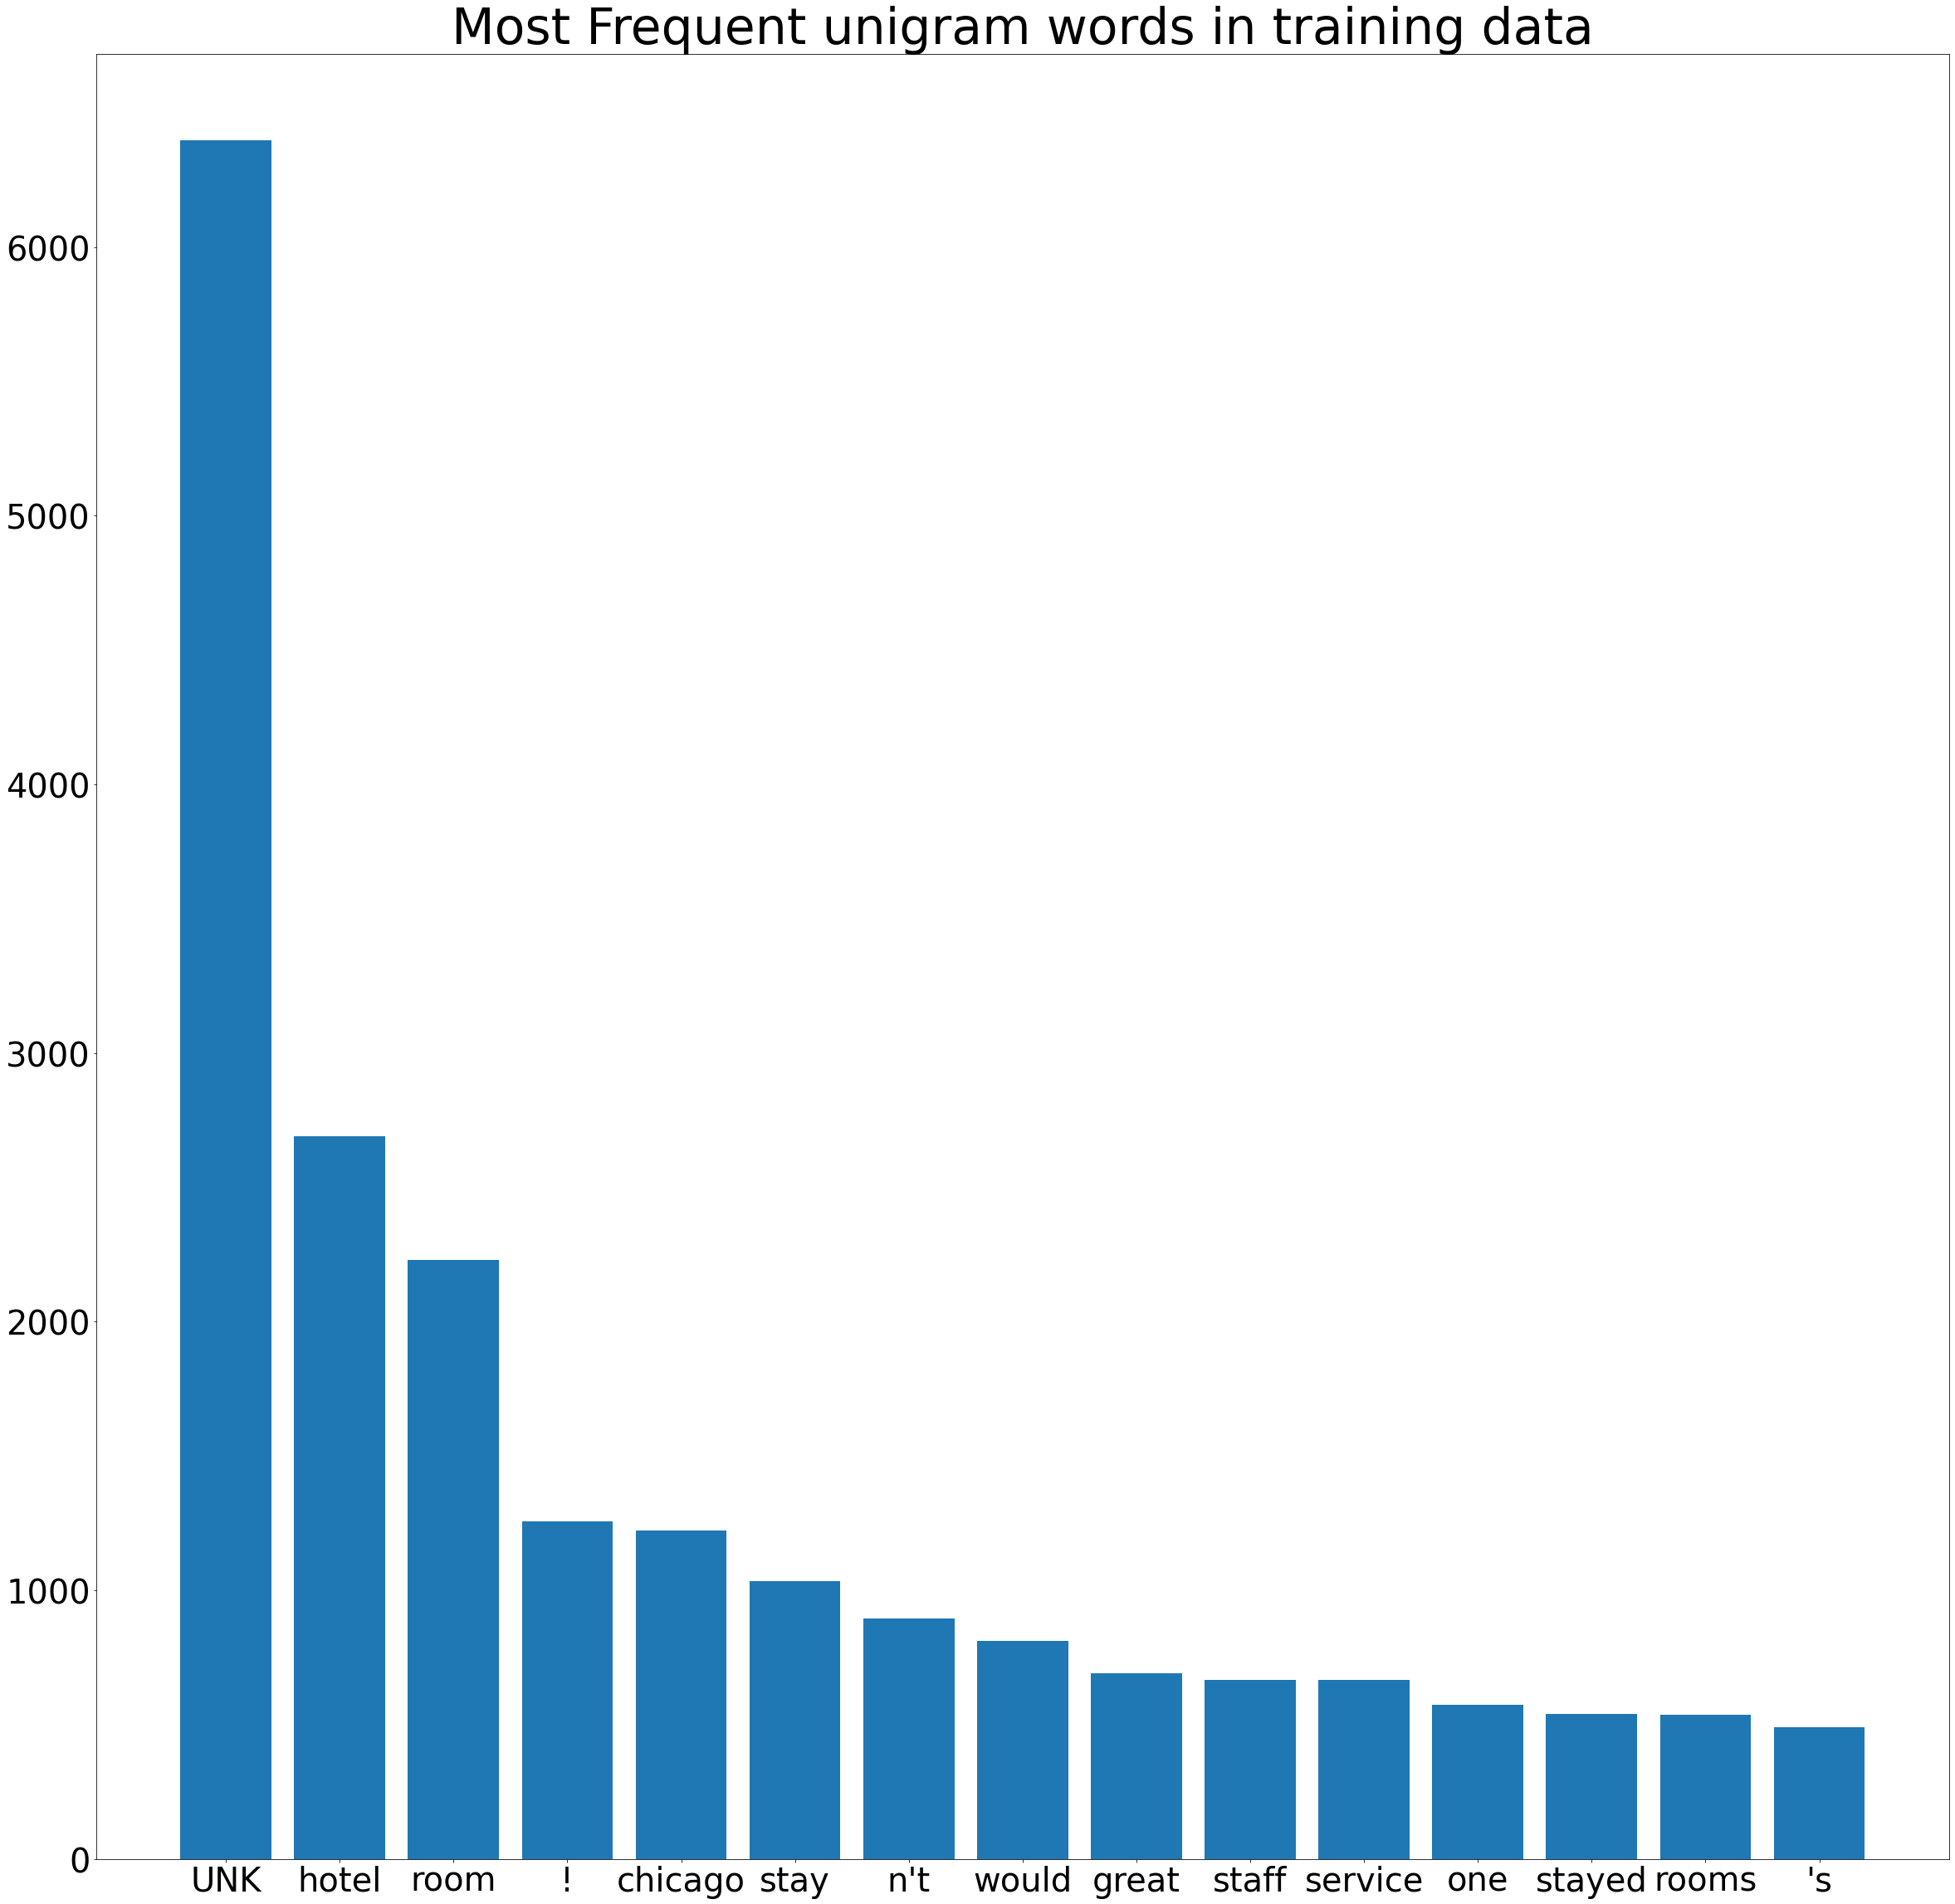

In [ ]:
stat_displayer.freq_wrd(tokenized_review_training,15,"unigram")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


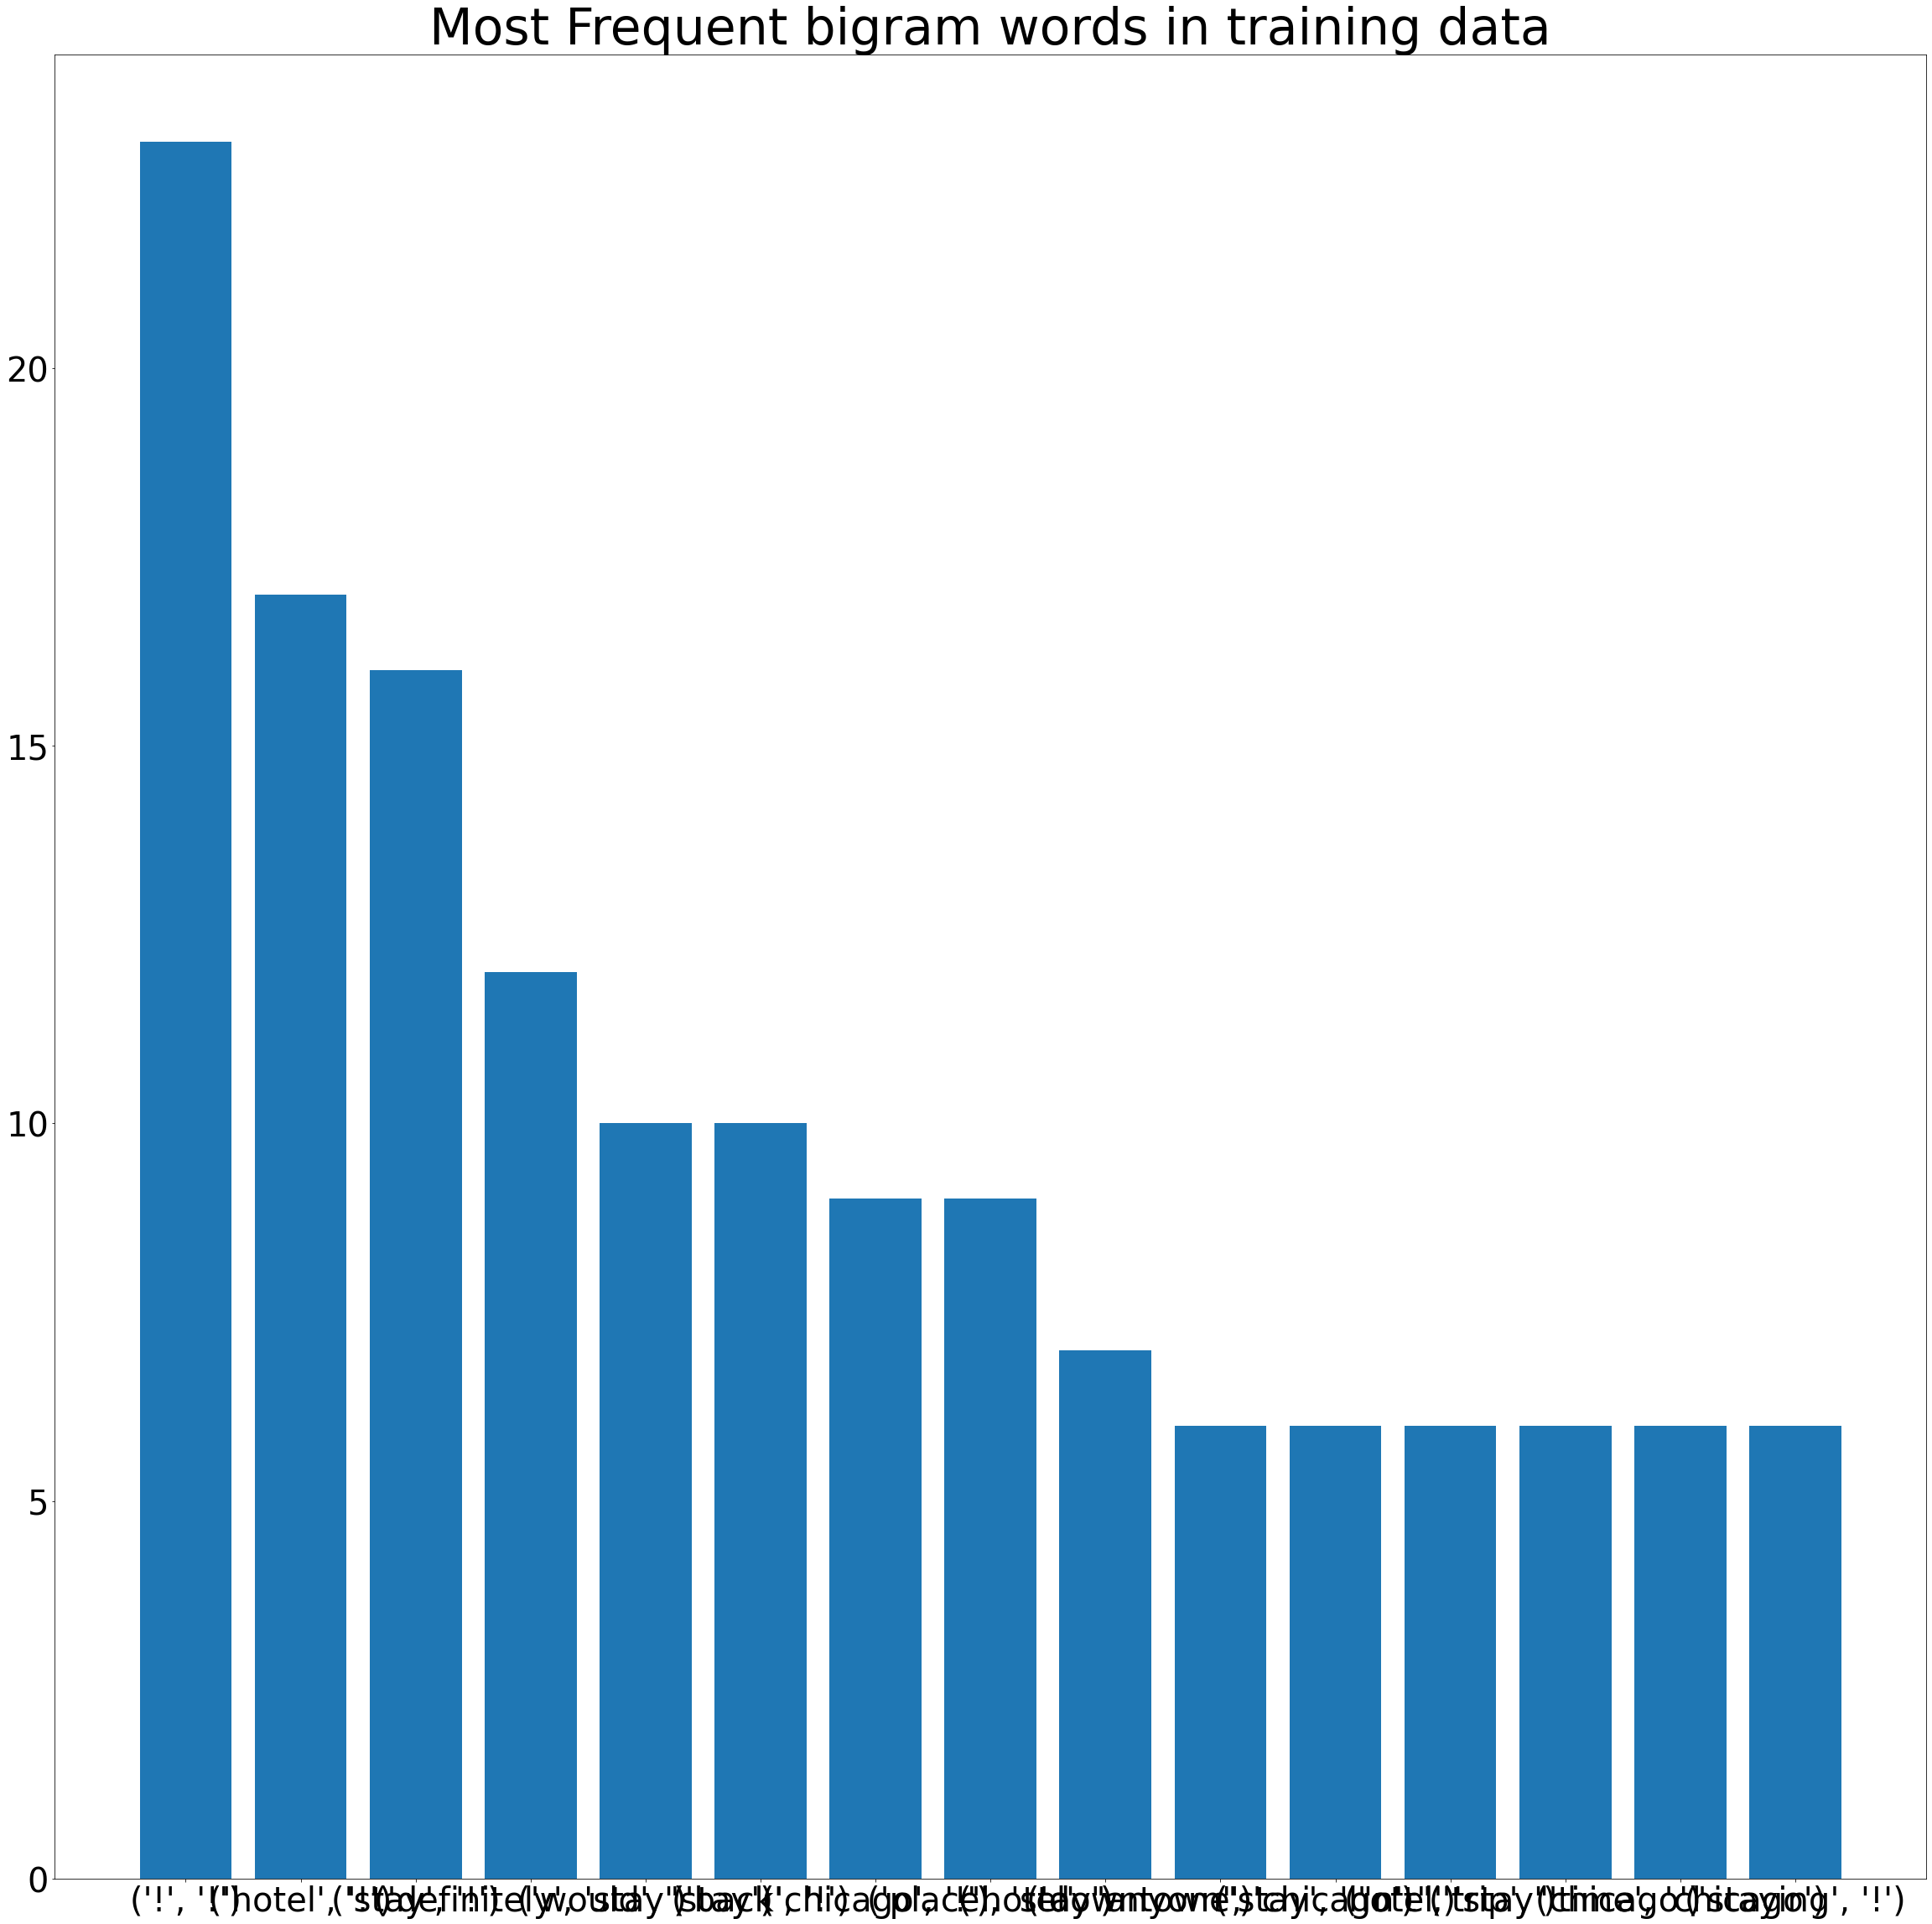

In [ ]:
stat_displayer.freq_wrd(tokenized_review_training,15,"bigram")

**Please answer the following question**:

**Q1.2: What did you do in your preprocessing part?**

Example answer format:

A: We tokenized and lowercased all the words.

Please answer on your writeup doc!

# Part 2: Compute Unsmoothed Language Models.

To start, you will write a program that computes unsmoothed unigram and bigram probabilities. You should consider real and deceptive reviews as separate corpora and
generate a separate language model for each set of reviews.
We have already loaded the data and (partially) preprocessed it and you probably did some of your own preprocessing. 

Note that you were allowed to use existing
tools for the purpose of preprocessing, but you must write the code for gathering n-gram counts and computing n-gram probabilities yourself. 

For example, consider the
simple corpus consisting of the sole sentence:


> the students liked the class

Part of what your program would compute for a unigram and bigram model, for example,
would be the following:


> $P("the") = 0.4; P("liked") = 0.2; P("the"|"liked") = 1.0; P("students"|"the") = 0.5$

Remember to add a symbol to mark the beginning of sentence. See Sept. 2nd lecture, p25-28 for an example.




**Advice**: jupyter notebooks (including colab) can be a double-edged sword. It's amazing and liberating to just start writing code and run it by simply running a cell. However, it gets messy very quickly. So, once you're done prototyping, you should be using functions (classes may be unnecessary but go for it if you want) to make things cleaner and easier to debug.

## 2.1 Unsmoothed Uni-gram Model.

In this part of the project, you are trying to compute the probabilities for a unigram model. You might want to take in a list of words, and return the probabilities for each
occurence. Think of an efficient data structure to use here given what ratio of reads and puts you expect.

Please look at the example above and consider how we get the probabilities.

Below is a starter point you can go from, but you DO NOT need to stick it. Feel free to use your own design.

In [ ]:
import pandas as pd

# ****  FUNCTION - unsmoothed_unigram_dic(lst)  *******

'''
Purpose:
Generate a dictionary to store unigram words and counts, and used to 
calculate he unigram/bigram probabilities.

Arguments:
lst: input list of corpus

Returns:
A dictionary of unigram words and count
---{Key : Count}

'''

def unsmoothed_unigram_dic(lst):
  unigrams={}                                                                   # Moving through every position in our list of list of words
  for l in lst:
    for i in range(len(l)): 
        if l[i] in unigrams:
            unigrams[l[i]] += 1                                                 # Incrementing the unigram dictionary values for every word found 
        else:
            unigrams[l[i]] = 1
  return unigrams

# ****  FUNCTION - unsmoothed_unigram_prob(lst, unigram_dic)  *******

'''
Purpose:
Calculate the probability of unigram words and store into a dictionary

Arguments:
lst: input list of corpus
unigram_dic: the dictionary of unigram words and count

Returns:
A separate unigram dictionary of words and probability
---{Key : Probability}
'''

def unsmoothed_unigram_prob(lst, unigram_dic):
  deno_cnst = sum(unigram_dic.values()) 
  for key, value in unigram_dic.items():                                        # Traversing through key value pairs in the unigram dictionary
    # do something with value
        unigram_dic[key] = unigram_dic[key]/(deno_cnst)                         # Generating the unigram probability based on the unigram count from the unigram dictionary and total no of words in our list
  return unigram_dic


## 2.2 Unsmoothed Bi-gram Model.

In this part of the project, you are trying to compute the probabilities for a bigram model. You can approach this with similar methods as above.

Remember the definition:
$p(w_n\mid w_{n-1})=\frac{C(w_{n-1}w_n)}{C(w_{n-1})}$ this means you might want to store two things (count of $w_{n-1}$ and count of $w_{n-1}w_n$).

In [ ]:
import pandas as pd

# ****  FUNCTION - unsmoothed_bigram_dic(lst)  *******

'''
Purpose:
Calculate the bigram tuple counts and store into a dictionary

Arguments:
lst: input list of corpus

Returns:
A bigram dictionary of words tuple and probability
---{Tuple : Count}

'''

def unsmoothed_bigram_dic(lst):
    bigrams={}                                                                  # An empty dictionary to store bigram tuples
    for l in lst:
      for i in range(len(l) - 1):                                               # Moving through every position in our list of list of words
        temp = (l[i], l[i+1])                                                   # Generating bigram tuple based on the position
        if not temp in bigrams:
            bigrams[temp] = 1                                                   # Incrementing the bigram dictionary values for every word found 
        else:
            bigrams[temp] += 1
    return bigrams  

# ****  FUNCTION - unsmoothed_bigram_prob(lst,unigram_dic,bigram_dic)  *******

'''
Purpose:
Calculate the bigram tuple probabilities and store into a dictionary

Arguments:
lst: input list of corpus
unigram_dic: unigram words counts used to be the denominators for calculating
probabilities of bigram tuple
bigram_dic: dictionary of bigram tuples and counts

Returns:
A bigram dictionary of words tuple and probability
---{Tuple : Probability}

''' 
def unsmoothed_bigram_prob(lst,unigram_dic,bigram_dic):
    unsmoothed_bigram_pro ={}
    for key, value in bigram_dic.items():                                       # Traversing through key value pairs in the bigram dictionary
    # do something with value
        unsmoothed_bigram_pro[key] = bigram_dic[key]/unigram_dic[key[0]]        # Generating the bigram probability based on the count of the bigram tuple from the bigram dictionary and the unigram count from the unigram dictionary
    return unsmoothed_bigram_pro    
            

**Please answer the following question**:

**Q2: What data structure are you using to store probabilities for unigrams and bigrams? Why did you select this data structure?**

Please answer on your writeup doc!

# Part 3: Smoothed Language Model
In this part, you will need to implement **at least one** smoothing method and **at least one** method to handle unknown words in the test data. You can choose any method(s) that you want for each. You should make clear
**what method(s)** were selected and **why**, providing a description for any non-standard approach (e.g., an approach that was not covered in class or in the readings). 

You should use the
provided validation sets to experiment with different smoothing/unknown word handling
methods if you wish to see which one is more effective for this task. (We will cover this in Part 4).

## 3.1 Unknown Words Handling

**Please answer the following questions:**

**Q3.1: How are you going to handle unknown words? What parameters might be needed? Do you need a method to determine the value?**

Please answer on your writeup doc!


In [ ]:
# ****  FUNCTION - replace_oov_words_by_unk(tknzd_rev) *******
"""
    Purpose : To replace words not in the given vocabulary with 'UNK' token. 
              The definition for our vocabulary includes every word with more than 1 occurence from the list of sentences 
    
    Arguments:
        tknzd_rev: List of lists of strings
    
    Returns:
        List of lists of strings, with words not in the vocabulary replaced with "UNK"
    """

def replace_oov_words_by_unk(tknzd_rev):
    rpl_lst=[]
    dic = unsmoothed_unigram_dic(tknzd_rev)
    not_vocabulary = [k for k in dic if dic[k] ==1]

    for l in tknzd_rev:
      for w in range(len(l)):
        # test if word w is in vocabulary
        if l[w] in not_vocabulary:
            l[w] = "UNK"
    return tknzd_rev

## 3.2 Smoothing

In this part of project, we are going to compute the probabilities for unigram and bigram models after smoothing.
There are several smoothing methods you can start with:
* add-k
* Kneser-Ney
* Good-Turing
* ...

You need to compute for both unigram and bigram models.

Below is a starter point using add-k smoothing. As always, you DO NOT need to follow it; you do need to implement add-k smoothing however feel free to implement any other smoothing methods you'd like and use those for later parts of the assignment!

In [ ]:

# ****  FUNCTION - add_k_unigram_prob(unigram_dic, k) *******
'''
Purpose:
Apply smoothing on unigram probabilities dic

Arguments:
unigram_dic: a dictionary of your unigrams
k: smoothing parameters

Returns:
a dictionary of results after smoothing

'''
def add_k_unigram_prob(unigram_dic, k):
  # TODO
    smoothed_unigram_pro ={}
    vocab_siz = len(unigram_dic.keys())                                                   # Total Vocabulary size
    adjst_deno_cnst = sum(unigram_dic.values()) + k*vocab_siz                             # Adjusted denominator of total word counts used for unigram probability measure
    for key, value in unigram_dic.items():
    # do something with value
        smoothed_unigram_pro[key] = (unigram_dic[key] + k)/(adjst_deno_cnst)              # Smoothing the unigram probability value
    return smoothed_unigram_pro

# ****  FUNCTION - add_k_bigram_prob(unigram_dic,bigram_dic, k) *******
'''
Purpose:
Apply smoothing on bigram probabilities dic

Arguments:
unigram_dic: a dictionary of your unigrams.
bigram_dic: a dictionary of your bigrams.
k: smoothing parameters

Returns:
a dictionary of results after smoothing

'''
def add_k_bigram_prob(unigram_dic,bigram_dic, k):
  # TODO
    smoothed_bigram_pro ={}
    vocab_siz = len(unigram_dic.keys())
    for key, value in bigram_dic.items():
    # do something with value
        smoothed_bigram_pro[key] = (bigram_dic[key] + k)/(unigram_dic[key[0]] + k*(vocab_siz))   # Adjusted denominator of total word counts used for bigram probability measure  
    return smoothed_bigram_pro



**Please answer the following question:**

**Q3.2: Which smoothing method did you choose? Are there any parameters, if so how are you planning to pick the value? If you choose to implement more than 1 method (not a requirement), please state each of them. Providing a description for any non-standard approach, e.g., an approach that was not covered in class or in the readings**

Please answer on your writeup doc!

#Cummulatively Processing the NGrams



We use all the functins that have been defined so far to completely process any given set of tokens - from preprocessing to generation of smoothed probability values. 

In [ ]:

# ****  FUNCTION - cumm_processing(self,tknzd_rvw,ngram,k) *******

'''
Purpose:
To preprocess our tokenized sentences before creating our language model classifier by removing special characters, stopwords and further treating it for unseen words and unknown words

Arguments:
tknzd_rvw:List of lists of strings
ngram: our choice for the ngram we are preprocessing (string value)
k: smoothing parameters

Returns:
a dictionary of probability values for our tokens after all preprocessing
'''
def cumm_processing(tknzd_rvw,ngram,k):
      no_spchctr = rmvspchr_reviews(tknzd_rvw)                                                                                                                          # Removing special characters
      no_spchctr_stp_wrd = rmv_stpwor(no_spchctr)                                                                                                                       # Removing stopwords
      replaced_no_sp_stp_wrd = replace_oov_words_by_unk(no_spchctr_stp_wrd)                                                                                             # Replacing unknown words with "UNK"
      
      if ngram =="unigram":                                                                                                                                             # Choice of unigram or bigram
        #replaced_no_sp_stp_wrd = replace_oov_words_by_unk(tknzd_rvw)
        unsmoothed_dic = unsmoothed_unigram_dic(replaced_no_sp_stp_wrd)                                                                                                 # Creating a dictionary of unigram words based on input list of words 
        unsmoothed_prob = unsmoothed_unigram_prob(replaced_no_sp_stp_wrd,unsmoothed_unigram_dic(replaced_no_sp_stp_wrd))                                                # Creating a dictionary of unigram word probabilities based on input list of words
        smoothed_replaced_prob= add_k_unigram_prob(unsmoothed_unigram_dic(replaced_no_sp_stp_wrd),k)                                                                    # Smoothing a dictionary of unigram words based on input list of words
        return smoothed_replaced_prob
      
      elif ngram =="bigram":
          #replaced_no_sp_stp_wrd = replace_oov_words_by_unk(tknzd_rvw)
          unsmoothed_dic = unsmoothed_bigram_dic(replaced_no_sp_stp_wrd)                                                                                                # Creating a dictionary of bigram words based on input list of words                                                                                                                               
          unsmoothed_prob = unsmoothed_bigram_prob(replaced_no_sp_stp_wrd,unsmoothed_unigram_dic(replaced_no_sp_stp_wrd),unsmoothed_bigram_dic(replaced_no_sp_stp_wrd)) # Creating a dictionary of bigram word probabilities based on input list of words
          smoothed_replaced_prob= add_k_bigram_prob(unsmoothed_unigram_dic(replaced_no_sp_stp_wrd),unsmoothed_bigram_dic(replaced_no_sp_stp_wrd) ,k)                    # Smoothing a dictionary of bigram words based on input list of words
          return smoothed_replaced_prob    



# Part 4: Perplexity
At this point, we have developed several language models: unigram vs bigram, unsmoothed vs smoothed. We now want to compare all the models. 

Implement code to compute the perplexity of a **“development set.”** (“Development set”
is just another way to refer to the validation set—part of a dataset that is distinct from
the training portion and the test portion.) Compute and report the perplexity of each
of the language models (one trained on true reviews and fake reviews) on
the development corpora. Compute perplexity as follows:
\begin{align*}
PP &= \left(\prod_i^N\frac{1}{P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)}\right)^{\frac{1}{N}}\\
&=\exp \frac{1}{N}\sum_{i}^N-\log P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)
\end{align*}
where $N$ is the total number of tokens in the test corpus and $P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)$
is the n-gram probability of your model. Under the second definition above, perplexity
is a function of the average (per-word) log probability: use this to avoid numerical
computation errors.

Please complete the following tasks and report what you have observed. Remember, lower perplexity means better model.

## Task 1: Compute perplexity for smoothed unigram and smoothed bigram. 
*Note: If you choose more than one smoothing method, pick one of them to compute. If you need to try different values of parameters, you can try them out here.*


In [ ]:
# ****  FUNCTION - unigram_perplexity(lst, uni_prob) *******

'''
Purpose:
To generate the perplexity values for a given list of unigram words based on the probability values of the same words from a training set

Arguments:
lst:List of strings
uni_prob: our list of (preprocessed) unigram word probabilities from our training set

Returns:
Perplexity value for all the unigram words present both in the input list and our training set 
'''

def unigram_perplexity(lst, uni_prob):
  perplexity = []
  for word in lst:                                                              # Iterating through every word in the list
      if word in uni_prob:                                                      # Checking if the unigram tuple from the list is present in the unigram dictionary generated from our training data
        perplexity.append(-np.log(uni_prob[word]))                              # Adding the negative logarithms of perplexity values to the perplexity list
  return np.exp(1.0 / len(perplexity) * sum(perplexity))                        # Returning actual perplexity values

# ****  FUNCTION - bigram_perplexity(lst, bi_prob, uni_prob) *******

'''
Purpose:
To generate the perpelxity values for a given list of bigrams based on the probability values of the same set of words from a training set

Arguments:
lst:List of strings
bi_prob:our list of (preprocessed) bigram word probabilities from our training set
uni_prob: our list of (preprocessed) unigram word probabilities from our training set

Returns:
Perplexity value for all the bigram words present both in the input list and our training set 
'''


def bigram_perplexity(lst, bi_prob, uni_prob):
    perplexity = []
    for i in range(len(lst)-1):                                                 # Iterating through position in the list
      bigramTuple = (lst[i], lst[i+1])                                          # Generating bigram tuple based on the position
      if bigramTuple in bi_prob:                                                # Checking if the bigram tuple from the list is present in the bigram dictionary generated from our training data
        perplexity.append(-np.log(bi_prob[bigramTuple]))                        # Adding the negative logarithms of perplexity values to the perplexity list
    return np.exp(1.0 / len(perplexity) * sum(perplexity))                      # Returning actual perplexity values


**Q4.1: Why do we need to compute perplexity after smoothing?**

Please answer on your writeup doc!

**Q4.2: Did you choose any values for parameters?**

Please answer on your writeup doc!

## Task 2: Compute perplexity for other smoothing methods (BONUS 🎉). 
*Note: If you only pick one smoothing method, you can omit this task. If you need to try different values of parameters, you can try them out here.*

In [ ]:
# TODO: compute perplexity for your rest of smoothing method.

**Q4.3: If your smoothing method needs to pick a parameter, what is the value of your parameter?**

Please answer on your writeup doc!

**Q4.4: Which smoothing method is the best among your choices?**

Please answer on your writeup doc!

# Part 5: Putting Everything Together and Submitting to Kaggle
Combining all the previous parts together, we have developed a bunch of language models. Before we proceed to the next step, let's check a few things (no need to answer):
* Did you train your model only on training set?
* Did you validate your model only on validation/development set?
* Did you determine all your parameters?

Finally, please answer:

**Q5: What is your choice of language model, and why?** (Hint: How do we usually choose language models? What is our selection criteria? _Look at the Sept. 9th lecture_)

Please answer on your writeup doc!



###Building a Language Model Classifier

In [ ]:
# ****  FUNCTION - unigramClassifier(tokens, truthfulProbs, deceptiveProbs) *******

'''
Purpose:
To preprocess our tokenized sentences before creating our language model classifier by removing special characters, stopwords and further treating it for unseen words and unknown words

Arguments:
tokens:List of lists of strings
truthfulProbs: Our final preprocessed list of unigram probabilities based on real reviews from the training set
deceptiveProbs: Our final preprocessed list of unigram probabilities based on fake reviews from the training set

Returns:
List of 1's and 0's for each review in the tokens based on the perplexity values of the reviews using training set's real and fake review probabilities. 
'''

def unigramClassifier(tokens, truthfulProbs, deceptiveProbs):
  result = []                                                                         # Prediction list
  for idx,line in enumerate(tokens):
    truthfulPerplexity = unigram_perplexity(line, truthfulProbs)                      # Applying the unigram perplexity model on the list of "real review" probabilities
    deceptivePerplexity = unigram_perplexity(line, deceptiveProbs)                    # Applying the unigram perplexity model on the list of "fake review" probabilities
    if truthfulPerplexity <= deceptivePerplexity:
      result.append(0)                                                                # Assigning 0 (binary) prediction value to the review based on the lower of truthful and deceptive probablity values
    else:
      result.append(1)                                                                # Assigning 1 (binary) prediction value to the review based on the lower of truthful and deceptive probablity values
  return result                      


# ****  FUNCTION - bigramClassifier(tokens, bitruthfulProbs, bideceptiveProbs, unitruthfulProbs, unideceptiveProbs) *******

'''
Purpose:
To preprocess our tokenized sentences before creating our language model classifier by removing special characters, stopwords and further treating it for unseen words and unknown words

Arguments:
tokens: List of lists of strings
bitruthfulProbs:Our final preprocessed list of bigram probabilities based on real reviews from the training set
bideceptiveProbs:Our final preprocessed list of bigram probabilities based on fake reviews from the training set
truthfulProbs: Our final preprocessed list of unigram probabilities based on real reviews from the training set
deceptiveProbs: Our final preprocessed list of unigram probabilities based on fake reviews from the training set


Returns:
List of 1's and 0's for each review in the tokens based on the perplexity values of the reviews using training set's real and fake review probabilities.
'''

def bigramClassifier(tokens, bitruthfulProbs, bideceptiveProbs, unitruthfulProbs, unideceptiveProbs):
  result = []                                                                         # Prediction list
  for idx,line in enumerate(tokens):
    truthfulPerplexity = bigram_perplexity(line, bitruthfulProbs, unitruthfulProbs)   # Applying the bigram perplexity model on the list of "real review" probabilities    
    deceptivePerplexity = bigram_perplexity(line, bideceptiveProbs, unideceptiveProbs)# Applying the bigram perplexity model on the list of "fake review" probabilities 
    if truthfulPerplexity <= deceptivePerplexity:
      result.append(0)                                                                # Assigning 0 (binary) prediction value to the review based on the lower of truthful and deceptive probablity values
    else:
      result.append(1)                                                                # Assigning 1 (binary) prediction value to the review based on the lower of truthful and deceptive probablity values
  return result

###Accuracy - Our Evaluation Criteria

In [ ]:
# ****  FUNCTION - accuracy_val(valid_y, pred) *******

'''
Purpose:
To find the accuracy of a given prediction set based on a test set.

Accuracy = (# of correct predictions)/(# of values in the prediction set)

Arguments:
valid_y: List of actual binary values (0's and 1's) for real and fake reviews from test set
pred: List of predicted binary values for real and fake reviews generated by a model

Returns:
Accuracy results based on the total number of correct predictions made by model
'''

def accuracy_val(valid_y, pred):
  accuracy=0
  for i in range(len(valid_y)):
    if valid_y[i] == pred[i]:                       # Checking if predicted values are equal the actual values from validation set
      accuracy+=1                                   # Incrementing the accuracy counter to take note of the correct predictions
  return accuracy/len(pred)

#Results

We obtain the following results applying the LM classifier developed above. Note that we have chosen to keep an optimal smoothing parameter of k =0.01 and k=0.2 for unigram and bigram LM repectively based on iterative results

In [ ]:
# Finding smooothed bigram and unigram probabilities seperately for real and fake reviews from training data

smoothed_process_unigram_prob_real = cumm_processing(tokenized_real_review_training,"unigram",0.2)      # Applying the cummulative pocessing function on our tokenized real reviews choosing a unigram model
smoothed_process_bigram_prob_real = cumm_processing(tokenized_real_review_training,"bigram",0.00001)    # Applying the cummulative pocessing function on our tokenized real reviews choosing a bigram model
smoothed_process_unigram_prob_fake = cumm_processing(tokenized_fake_review_training,"unigram",0.2)      # Applying the cummulative pocessing function on our tokenized fake reviews choosing a unigram model
smoothed_process_bigram_prob_fake = cumm_processing(tokenized_fake_review_training,"bigram",0.00001)    # Applying the cummulative pocessing function on our tokenized fake reviews choosing a bigram model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The prediction values based on the unigram classifier are given below:

In [ ]:
result_uni = unigramClassifier(tokenized_review_validation, smoothed_process_unigram_prob_real, smoothed_process_unigram_prob_fake)   ##Applying the unigram classifier on the validation dataset based on our obtained probabilities of real and fake reviews from training data
print(result_uni)

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]


The prediction values based on the bigram classifier are given below:

In [ ]:
result_bi = bigramClassifier(tokenized_review_validation, smoothed_process_bigram_prob_real, smoothed_process_bigram_prob_fake, smoothed_process_unigram_prob_real, smoothed_process_unigram_prob_fake)   ##Applying the bigram classifier on the validation dataset based on the above obtained probabilities of real and reviews from training data
print(result_bi)

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]


The accuracy based on the unigram classifier is given below:

In [ ]:
accr_uni = accuracy_val(y_valid,result_uni)      #Accuracy values calculated for unigram classifier based of the binary y values 0's (real reviews) and 1's (fake reviews) from validation data
print(accr_uni)

0.70625


The accuracy based on the bigram classifier is given below

In [ ]:
accr_bi = accuracy_val(y_valid,result_bi)       #Accuracy values calculated for bigram classifier based of the binary y values (0's (real reviews) and 1's (fake reviews) from validation data )
print(accr_bi)

0.60625


###Conclusion

Considering how the **accuracy** of the **unigram classifier** (70.625 %) is **more** than that of bigram classifier (60.625 %), we conclude that it more effective to choose a unigram based LM for the problem at hand.

## Part 5.1: First Model Submission to Kaggle

Now we need to apply our model to testing data. What you need to do:
* Takes the test data as input, and generates an output of your prediction based on your chosen language model
* Your output file should be ONLY your predictions
* Submit to Kaggle

You should use your trained model to predict labels for all the reviews in `TestData.txt`. Output your predictions to a **csv** file and submit it to kaggle. Each line should contain the id of the test review and its corresponding prediction (in total 160 lines). In other words, your output should look like (**including the header**):
```
Id,Prediction
0,0
1,0
2,1
3,0
...
160,1
```
Note that you should add the header `Id,Prediction` and there is no space in the output. The Id starts from 0 (not 1).

Use this kaggle [link](https://www.kaggle.com/t/eb382e53c0cc448d9da21b3527d) to submit your output. Your team name should be the concatenation of your netids, **exactly in the same order as this notebook is named**. For example, if notebook is 4740_FA21_p1_mb2363_ssc255, then Kaggle group should be mb2363_ssc255.

You have 10 submissions **per day** so do not wait until the last minute! There is additionally a baseline score on Kaggle for you to benchmark against.


###Applying to the test dataset

In [ ]:

pred = unigramClassifier(tokenized_review_test, smoothed_process_unigram_prob_real, smoothed_process_unigram_prob_fake)   # Applying the unigram classifer method to the test data
Predicted_1 = pd.DataFrame(pred, columns= ['Prediction'])                                                                 # Creating a dataframe with our predictions
Predicted['Id'] = range(0,160)                                                                                            # Creating an ID column for the same dataframe 
Predicted_1 = Predicted[['Id', 'Prediction']]                                                                             # Joining our ID and predictions dataframe into one
print(Predicted_1)

      Id  Prediction
0      0           1
1      1           1
2      2           1
3      3           1
4      4           0
..   ...         ...
155  155           0
156  156           0
157  157           0
158  158           1
159  159           1

[160 rows x 2 columns]


In [ ]:
# TODO: Add code to generate the Kaggle output file and submit the output file to Kaggle
df = pd.DataFrame(result_uni, columns= ['Prediction'])
df.to_csv("unigram.csv")

In [ ]:
!cp unigram.csv "drive/My Drive/"

# Part 6: Naive Bayes

The Naive Bayes classification method is based on Bayes Rule. Suppose we have a review *d* and its label *c* (either 0 or 1).
\begin{align*}
P(c|d)=\frac{P(d|c)P(c)}{P(d)}
\end{align*}
Likelihood: $P(d|c)$. In real/deception corpus, how likely *d* would appear.

Prior: $P(c)$. The probability of real/deceptive reviews in general.

Posterior: $P(c|d)$. Given *d*, how likely is it that it is real/deceptive.

Goal: $\underset{c\in \{0,1\}}{\operatorname{argmax}} P(c|d)$, which is equivalent to $\underset{c\in \{0,1\}}{\operatorname{argmax}} P(d|c)P(c)$.

The equivalence holds because $P(d)$ is the same for any $c$. Thus the denominator can be dropped.

Denote $d=\{x_1, x_2, ..., x_n\}$ where $x_i$'s are words in the reviews *d* (sometimes called features). Unlike n-gram language modelling, we make the multinomial Naive Bayes independence assumption here, where we assume positions of words do not matter. Formally, 
\begin{align*}
&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(d|c)P(c)\\
=&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(x_1, ..., x_n|c)P(c)\\
=&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(x_1|c)P(x_2|c)...P(x_n|c)
\end{align*}

Now we only need to collect the occurences of each word for the classification. This is often called a **bag of words** feature. 

For instance, in the sentence `All for one and one for all .`, the bag of words feature would be `{"all": 2, "for": 2, "one": 2, "and": 1, ".": 1}`. Essentially, the bag of words feature is a dictionary which maps the word to its occurences. We can see that the order is not considered here.

Now, your goal is to implement the Multinomial Naive Bayes. You can use existing codes or Python packages, and adapt them to our reviews classification task.

You might find the following packages/functions useful:

* nltk.word_tokenize(), nltk.word_tokenize()
* nltk.classify.naivebayes()
* sklearn.feature_extraction.text
* sklearn.naive_bayes.MultinomialNB()

**Please answer the following question(s).**

**Q6: Comparing Multinomial Naive Bayes with the unigram language model, which one do you expect to perform better? Why?**

Please answer on your writeup doc!

## 6.1 Implementation

In [ ]:
# ****  FUNCTION - nb_classifier(test_data,train_real_data,train_fake_data,model) *******

'''
Purpose:
To use the Naive Bayes (NB) Classifier and predict whetehr a given test review is real or fake and also further find the accuracy of a given prediction value set based on a test set

Arguments:
test_data: Test data whose real or fake labels we are predicting
train_data: Reviews training data which is used to train our NB classifer
model:Count vectorizer or tfidf vectorizer counts for the number of words in our training and test set 

Returns:
The predictions on the test data made by the classifier model based on the training data
'''
import re
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def nb_classifier(test_data,train_data,model):

  y_train = train_data["y"]                                         # Output label columns of training data
  y_test = test_data["y"]                                           # Output label columns of test data
  X_train = train_data["Review"]                                    # Output "review" (X) columns of training data
  X_test = test_data["Review"]                                      # Output "review" (X) columns of test data
  
  if model == "countvectorizer":
    method = CountVectorizer()
  elif model == "tfidfvectorizer":
    method = TfidfVectorizer(stop_words = "english", max_df=0.2)    # specifying the vectorizer to ignore stop words and maximum document freqency of value = 0.2
  
  method_train = method.fit_transform(X_train.values)               # Transform the training data using only the 'review' column values of training data: method_train 
  method_test = method.transform(X_test.values)                     # Transform the test data using only the 'review' column values of test data: count_test 

  nb_classifier = MultinomialNB()                                   # Instantiate a Multinomial Naive Bayes classifier: nb_classifier

  nb_classifier.fit(method_train, y_train)                          # Fit the classifier to the training data

  pred = nb_classifier.predict(method_test)                         # Create the predicted values: pred

  score = metrics.accuracy_score(y_test, pred)                      # Calculate the accuracy score: score
  return pred

  

##Performance on validation set

The NB classifier based on Count Vectorizer and Tfidf Vectorizer is applied on the validation data we are given and checked for their respective accuracies.

In [ ]:
# Predicting the labels of the validation dataset and finding the accuracy of prediction using Counte Vectorizer and Tfidf Vectorizer model

pred_count_vecto_valid = nb_classifier(df_review_valid,df_review_train,"countvectorizer") # Predicting labels of validation tablelled data using the Count Vectorizer nb_classifier 
print("The accuracy using Count Vectorizer model is {0}".format(accuracy_val(y_valid,pred_count_vecto_valid))) # Calculating the accuracy of Count Vectorizer model

pred_tfidf_vecto_valid = nb_classifier(df_review_valid,df_review_train,"tfidfvectorizer") # Predicting labels of validation tablelled data using the Tfidf Vectorizer nb_classifier 
print("The accuracy using Tfidf Vectorizer model is {0}".format(accuracy_val(y_valid,pred_tfidf_vecto_valid)))  # Calculating the accuracy of Tdidf Vectorizer model

The accuracy using Count Vectorizer model is 0.90625
The accuracy using Tfidf Vectorizer model is 0.8875


#6.15 Conclusion - Final Choice of NB Classifier

We see that the **Count Vectorizer** model gives **higher accuracy** (90.625%) compared to the Tfidf vectorizer model (88.75%) on the validation set. We hence proceed to choose the CountVectorizer for the test data set.



## 6.2 Putting Everything Together and Submitting to Kaggle

You should use your trained model to predict labels for all the reviews in `P1_real_fake_review_test.txt`. Output your predictions to a **csv** file and submit it to kaggle. The format should follow Part 6 as well.

Use the previous kaggle link to submit your output! (You are allowed multiple submissions!)

###Applying to test set data

We apply the NB classifier based on Count Vectorizer to our test data. 

In [ ]:
pred = nb_classifier(df_test_review,df_review_train,"countvectorizer")
Predicted_2 = pd.DataFrame(pred, columns= ['Prediction'])
Predicted['Id'] = range(0,160)
Predicted_2 = Predicted[['Id', 'Prediction']]
Predicted_2

,Id,Prediction
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
155,155,0
156,156,0
157,157,0
158,158,1


In [ ]:
Predicted_2.to_csv("Predicted.csv")

In [ ]:
!cp Predicted.csv "drive/My Drive/"

# Work Distribution

**Please briefly describe how you divided the work.**

Please answer on your writeup doc!


# Project Feedback [1 point]
 e on the course staff are trying our best to adapt our teaching, projects and everything else in the class to best help you learn (and hope you get as excited about NLP as we do!). We would immenselly appreciate it if you could provide us feedback (it's a super short form!!) on this project and **it's worth 1 point of your project grade**

Link to the feedback form: https://forms.gle/EfYoeggeGkr2Mb6Y7

We will use this feedback to improve both **upcoming projects** and projects for next year. 

Thank you so much!

# Submitting the Notebook

1. Go to File (upper left corner) -> Download .ipynb -> submit this downloaded file to cms
2. Run the first code block
3. Replace our placeholder for your correct Google Drive directory structure in the 2nd code block below. Run the code block
4. Put the name of this notebook into our placeholder in the 3rd code block. Run the code block
5. Then go to the folder icon on the very left panel, under the orange CO logo. Click on the folder and wait for a PDF version of your notebook to appear. Might take a few minutes.
6. Download the pdf version and submit to Gradescope

In [ ]:
%%capture
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
%%capture
# the red text is a placeholder! Change it to your directory structure!
!cp 'drive/My Drive/Colab Notebooks/4740_FA21_p1_netid1_netid2.ipynb' ./ 

In [ ]:
# the red text is a placeholder! Change it to the name of this notebook!
!jupyter nbconvert --to PDF "4740_FA21_p1_netid1_netid2.ipynb"

# Once Again
Please make sure do the following:
1. Submit the PDF version of your colab notebook on Gradescope.
2. Submit a PDF version of your Google Doc with all your written questions complete on Gradescope.
3. Submit the .ipynb of your colab notebook on CMS.

# You are done! ✅